In [1]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime
%matplotlib inline

## Describe DataSet
I am interested inthis data set because of the nature of the data, World Suicide Statistics, and because it is provided by the World Health Organization, WHO.  Unfortunately, the data seems to be just a subset of a bigger data set and focuses only on countries, population, and number of suicides.  It would have been interesting if the data set would contain more detail information.  However, for the purpose of the report, it provides sufficient information to analyze and get feed back.

The data set contains basic information on the number of suices from 1980 - 2016 by country, year, and demographic group.

In [2]:
suicide_data = pd.read_csv('C:\\MyData\\DataSet\\who-suicide-statistics\\who_suicide_statistics.csv')

In [3]:
np.random.seed(53)
obs, feat = suicide_data.shape
suicide_data.sample(5)

,country,year,sex,age,suicides_no,population
36847,Spain,1999,male,25-34 years,368.0,3349113.0
27489,New Zealand,2012,male,5-14 years,7.0,297240.0
41545,United Kingdom,1986,female,25-34 years,161.0,3980652.0
18746,Iceland,1987,female,35-54 years,2.0,26200.0
38569,Syrian Arab Republic,1985,female,25-34 years,0.0,NaN


In [4]:
print(str("Dataset consist of " + str(obs) + " observations and " + str(feat) + " features. Features are following:"))

Dataset consist of 43776 observations and 6 features. Features are following:


In [5]:
suicide_data.isnull().sum()

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64

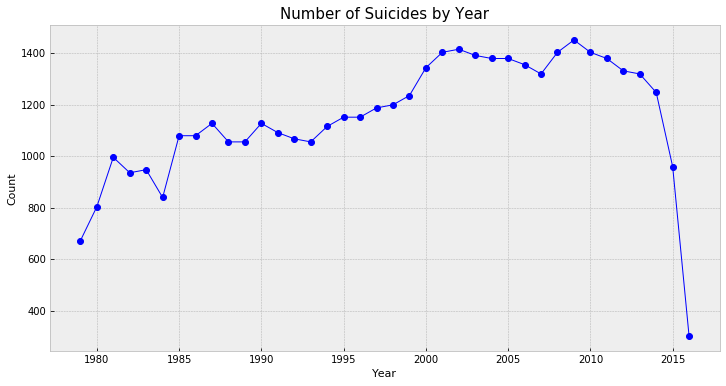

In [6]:
temp1 = suicide_data.groupby(suicide_data.year)[['year']].count()
temp1 = temp1.rename(columns={"year": "Count"})

plt.figure(figsize=(12, 6))
plt.style.use('bmh')
plt.plot(temp1.index, 'Count', data=temp1, color='blue', marker='o', linewidth=1)
plt.xlabel('Year', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.title('Number of Suicides by Year', loc='center', fontsize=15)
plt.show()

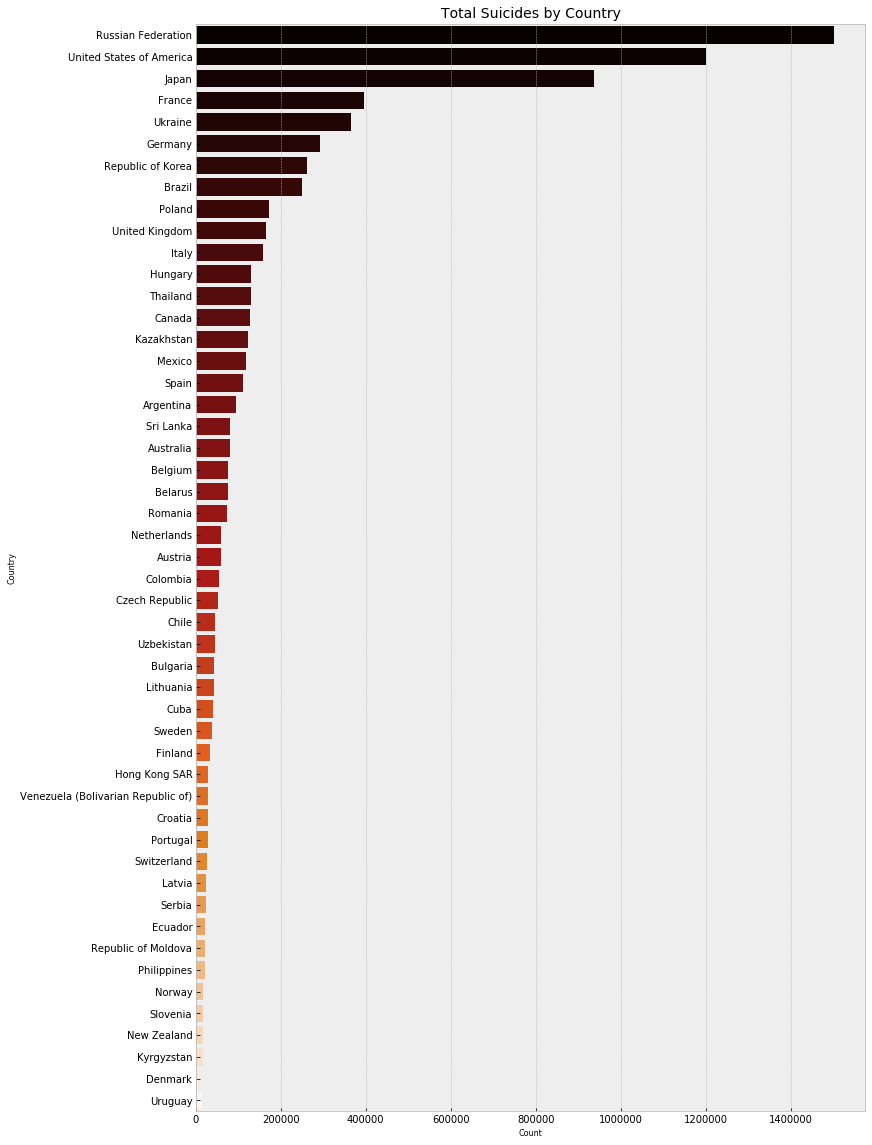

In [7]:
temp2 = suicide_data.groupby(suicide_data.country)[['suicides_no']].sum()
temp2 = temp2.rename(columns={"suicides_no": "Count"})
temp2 = temp2.sort_values(by='Count', ascending=False)
temp2_top = temp2.head(50)

plt.figure(figsize=(12, 20))
sns.barplot(y=temp2_top.index, x='Count', data=temp2_top, palette='gist_heat', orient='h')
plt.xlabel('Count', fontsize=8)
plt.ylabel('Country', fontsize=8)
plt.title('Total Suicides by Country', loc='center', fontsize=14)
plt.show()

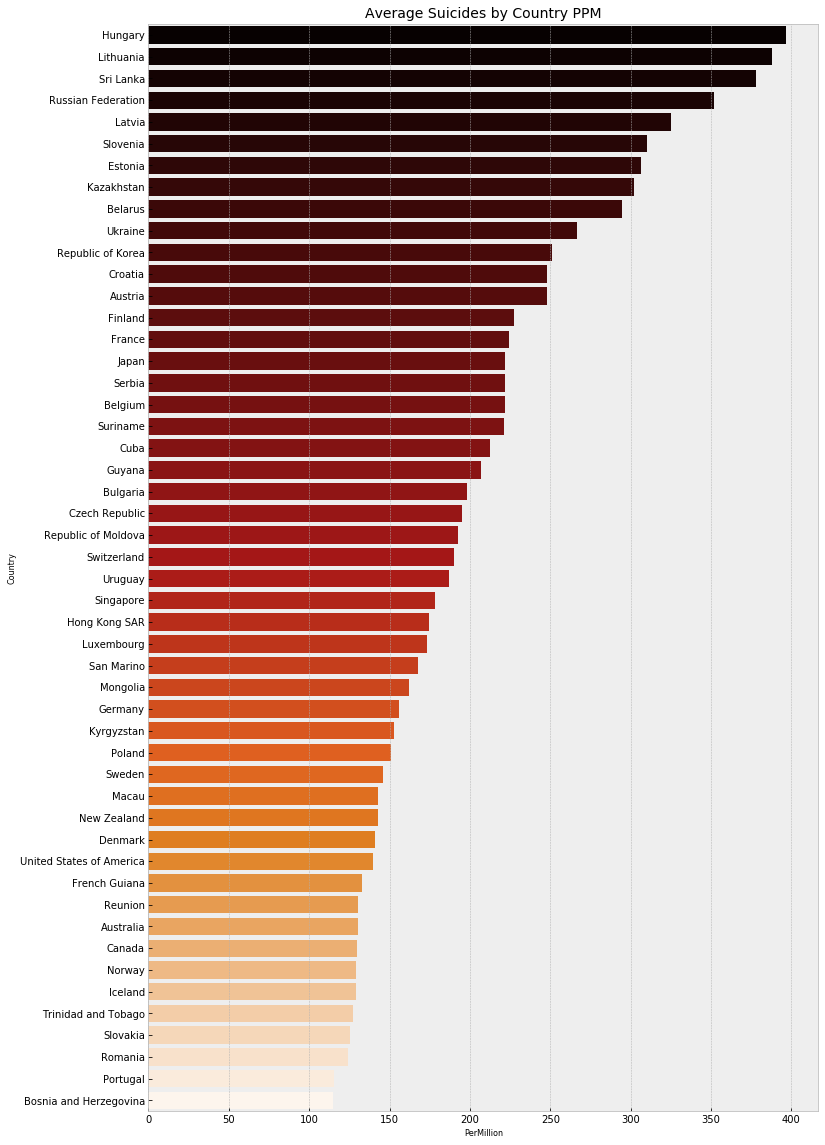

In [8]:
temp3 = suicide_data.copy()
temp3['ppm'] = suicide_data.suicides_no / suicide_data.population * 1000000
temp4 = temp3.groupby(suicide_data.country)[['ppm']].mean()

temp4 = temp4.sort_values(by='ppm', ascending=False)
temp4_top = temp4.head(50)

plt.figure(figsize=(12, 20))
sns.barplot(y=temp4_top.index, x='ppm', data=temp4_top, palette='gist_heat', orient='h')
plt.xlabel('PerMillion', fontsize=8)
plt.ylabel('Country', fontsize=8)
plt.title('Average Suicides by Country PPM', loc='center', fontsize=14)
plt.show()

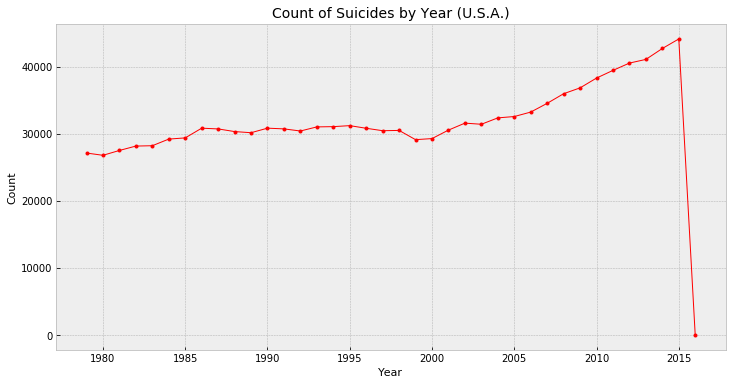

In [9]:
# Suicides in the U.S.
us_data = suicide_data[suicide_data.country == 'United States of America']

Count_by_Year = us_data.groupby(us_data.year)[['suicides_no']].sum()
Count_by_Year = Count_by_Year.rename(columns={"suicides_no": "Count"})
#print(Count_by_Year)

plt.figure(figsize=(12,6))
plt.plot(Count_by_Year.index, 'Count', data=Count_by_Year, marker='.', color='red', linewidth=1)
plt.xlabel('Year', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.title('Count of Suicides by Year (U.S.A.)', loc='Center', fontsize=14)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


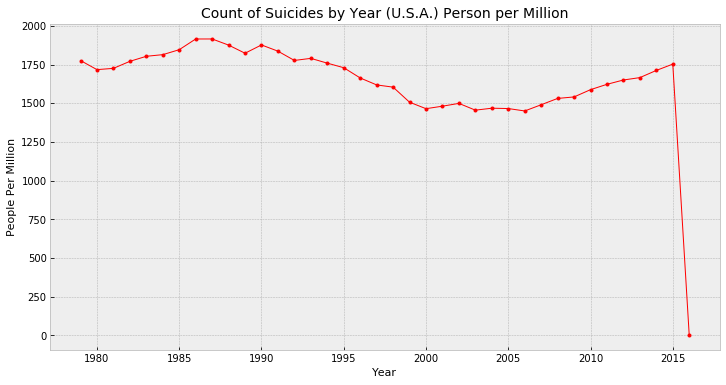

In [11]:
# Suicides PPM U.S.A. only
us_data['ppm'] = us_data.suicides_no / us_data.population * 1000000
#print(us_data)

PPM_by_Year = us_data.groupby(us_data.year)[['ppm']].sum()
PPM_by_Year = PPM_by_Year.rename(columns={"ppm": "Count"})
#print(PPM_by_Year)

plt.figure(figsize=(12, 6))
plt.plot(PPM_by_Year.index, 'Count', data=PPM_by_Year, marker='.', color='red', linewidth=1)
plt.xlabel('Year', fontsize=11)
plt.ylabel('People Per Million', fontsize=11)
plt.title('Count of Suicides by Year (U.S.A.) Person per Million', loc='Center', fontsize=14)
plt.show()

                       Count
year_age                    
1979:15-24 years  245.896457
1979:25-34 years  326.595201
1979:35-54 years  322.350943
1979:5-14 years     8.525646
1979:55-74 years  360.049750
1979:75+ years    513.831025
1980:15-24 years  245.206795
1980:25-34 years  317.807341
1980:35-54 years  314.895563
1980:5-14 years     8.044393
1980:55-74 years  343.254539
1980:75+ years    489.146658
1981:15-24 years  243.455056
1981:25-34 years  328.105748
1981:35-54 years  323.295616
1981:5-14 years     9.652632
1981:55-74 years  343.047097
1981:75+ years    479.051070
1982:15-24 years  240.343954
1982:25-34 years  322.514553
1982:35-54 years  321.587250
1982:5-14 years    11.617739
1982:55-74 years  361.799526
1982:75+ years    514.129990
1983:15-24 years  229.345463
1983:25-34 years  320.286303
1983:35-54 years  314.851190
1983:5-14 years    11.815168
1983:55-74 years  360.510316
1983:75+ years    567.811418
...                      ...
2012:15-24 years  216.556286
2012:25-34 yea

Text(0.5, 1.0, 'Number of Suicides by Age Group (PPM)')

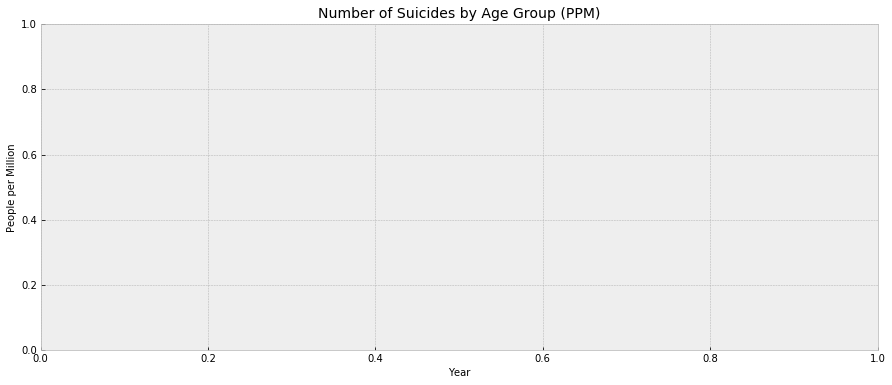

In [30]:
# Suicides PPM U.S.A. only
temp_us_data = us_data.copy()
temp_us_data['year_age'] = temp_us_data['year'].astype(str) + ':' + temp_us_data.age
#us_data['ppm'] = us_data.suicides_no / us_data.population * 1000000
#print(us_data)

PPM_by_Year = temp_us_data.groupby(temp_us_data.year_age)[['ppm']].sum()
PPM_by_Year = PPM_by_Year.rename(columns={"ppm": "Count"})
print(PPM_by_Year)

plt.figure(figsize=(15,6))
#plt.fill_between(PPM_by_Year.index, '5-14 Years', data=PPM_by_Year, color="skyblue", alpha=0.2)
#plt.plot(PPM_by_Year.index, '5-14 Years', data=PPM_by_Year, marker = ".", color="Slateblue", alpha=0.6, linewidth=1)

#plt.fill_between(Fatalities.index, '15-24 Years', data=Fatalities, color="olive", alpha=0.2)
#plt.plot(Fatalities.index, '15-24 Years', data=Fatalities, color="olive", marker = ".", alpha=0.6, linewidth=1)

#plt.fill_between(Fatalities.index, '25-34 Years', data=Fatalities, color="olive", alpha=0.2)
#plt.plot(Fatalities.index, '25-34 Years', data=Fatalities, color="olive", marker = ".", alpha=0.6, linewidth=1)

#plt.fill_between(Fatalities.index, '35-54 Years', data=Fatalities, color="olive", alpha=0.2)
#plt.plot(Fatalities.index, '35-54 Years', data=Fatalities, color="olive", marker = ".", alpha=0.6, linewidth=1)

#plt.fill_between(Fatalities.index, '55-74 Years', data=Fatalities, color="olive", alpha=0.2)
#plt.plot(Fatalities.index, '55-74 Years', data=Fatalities, color="olive", marker = ".", alpha=0.6, linewidth=1)

#plt.fill_between(Fatalities.index, '75+ Years', data=Fatalities, color="olive", alpha=0.2)
#plt.plot(Fatalities.index, '75+ Years', data=Fatalities, color="olive", marker = ".", alpha=0.6, linewidth=1)

#plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('People per Million', fontsize=10)
plt.title('Number of Suicides by Age Group (PPM)', loc='Center', fontsize=14)